In [1]:
# Imports
import random
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

Backing off send_request(...) for 23.8s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001CAA9977D00>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


## Data Prepation

In [2]:
# Reading the data
data = pd.read_csv('../Data/training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1")
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
# Inserting Column names
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'tweet']
data.head()

,target,ids,date,flag,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Backing off send_request(...) for 22.3s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001CAA99A3E50>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


In [4]:
# Dropping unnecessary columns and updating target values
data = data.drop(['date','ids', 'flag', 'user'], axis=1)
data["target"].replace({0: 0, 4: 1}, inplace=True) # 0 for -ve class and 1 for +ve class
data.head()

,target,tweet
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew


In [5]:
# data decsription
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   tweet   1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [6]:
# Insight on target values and counts
data['target'].value_counts()

1    800000
0    799999
Name: target, dtype: int64

In [7]:
# spilt the data into test and train set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["target"]):
    train_set = data.loc[train_index]
    test_data = data.loc[test_index]

    #splits the train_set into val and train data
Train_data, Val_data = train_test_split(train_set, test_size=0.2, random_state=7)


Backing off send_request(...) for 45.8s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001CAA99A30A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


In [8]:
# saves the data into csv files
# test_data.to_csv("Test data.csv")
# Train_data.to_csv("Train data.csv")
# Val_data.to_csv("Validation data.csv")

In [9]:
print(Train_data.info())
Train_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023999 entries, 745688 to 341109
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1023999 non-null  int64 
 1   tweet   1023999 non-null  object
dtypes: int64(1), object(1)
memory usage: 23.4+ MB
None


,target,tweet
745688,0,"I know in the grand scheme of things it's not important where we get hitched, but the Harbourfront Music Garden would've been beautiful."
768060,0,Went t petsmart and found that Dustin wasn't adopted after all Stil took two white cats Monroe and Sophia Darling there for adoption.
1572707,1,@Khoobi4 Date Night How exciting! I hope you guys got to enjoy some quiet alone adult time ;)
909999,1,is hangin with the love of my life. Tessa McCravy!!
1023548,1,"Wasting my time, on the computer, nothing else to do, besides wait, for something interesting."


In [10]:
print(Val_data.info())
Val_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256000 entries, 59852 to 617001
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  256000 non-null  int64 
 1   tweet   256000 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.9+ MB
None


,target,tweet
59852,0,@ShirEnde DAAAAAAAAAAAAMMMMMNNN YOOOUUUU
465600,0,@Samantha_Mayy have an amazing time in Turkey!! will miss you
578779,0,@TheeBlakBeckham sad I'm missing kickball let's play this weekend!
866994,1,@YourFavoritePJ well done DJing tonight I had fun even tough i was a bit quiet just had to get used to it
870877,1,Listening to the rain


In [11]:
print(test_data.info())
test_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 291262 to 897065
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  320000 non-null  int64 
 1   tweet   320000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.3+ MB
None


,target,tweet
291262,0,is crying because she just remembered that she forgot to go to the jb livechat on thursday
1359074,1,qu buy OPEN HOUSE THIS WEEKEND 11AM-4PM. Best Value One Bedroom in LIC! (Long Island City) $395000 1bd: http://tinyurl.com/pt8nqd
1009650,1,"@GinoandFran Fran, can you greet me on air??? If that's okay. HAHAHAHA. THANKS !"
1538713,1,"@mangelanchez OMG, thats awesome! Goood luck! U can meet caaute calgary boys buying themselves clothes, and tell them all about me LOL"
1046689,1,@Sumana_Raja hahahhaha! That is a very good point.


In [12]:
# Create an input pipeline using tf.data
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop('target')
    features = df.pop('tweet')
    ds = tf.data.Dataset.from_tensor_slices((features.values, labels.values))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [13]:
# Let’s create three Dataset objects for training, validation, and testing:
batch_size = 256
train_ds = df_to_dataset(Train_data, batch_size=batch_size)
val_ds = df_to_dataset(Val_data, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test_data, shuffle=False, batch_size=batch_size)

In [14]:
# Displaying the shapes and dtypes of the first batch
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (256,)
inputs.dtype: <dtype: 'string'>
targets.shape: (256,)
targets.dtype: <dtype: 'int64'>
inputs[0]: tf.Tensor(b'I got a notice from the school saying soon I will leave CPH and the dorm...as if I needed further reminding.  *sniff*', shape=(), dtype=string)
targets[0]: tf.Tensor(0, shape=(), dtype=int64)


In [15]:
max_length = 100
max_tokens = 2000
text_vectorization = layers.TextVectorization(max_tokens=max_tokens, output_mode="int", output_sequence_length=max_length,)
text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y),num_parallel_calls=4)

val_ds = val_ds.map(lambda x, y: (text_vectorization(x), y),num_parallel_calls=4)

test_ds = test_ds.map(lambda x, y: (text_vectorization(x), y),num_parallel_calls=4)


Backing off send_request(...) for 223.2s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001CAA99A3040>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


In [24]:
# Displaying the shapes and dtypes of the first batch
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    print("inputs[1]:", inputs[1])
    print("targets[1]:", targets[1])
    break

inputs.shape: (256, 100)
inputs.dtype: <dtype: 'int64'>
targets.shape: (256,)
targets.dtype: <dtype: 'int64'>
inputs[0]: tf.Tensor(
[  1  57  23   5 162  32   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0], shape=(100,), dtype=int64)
targets[0]: tf.Tensor(0, shape=(), dtype=int64)
inputs[1]: tf.Tensor(
[ 21  49 185   1  98   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [19]:
# A integer input for vocab indices.
inputs = keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
embedded = layers.Embedding(input_dim=max_tokens, output_dim=64,mask_zero=True)(inputs)

x = layers.Bidirectional(layers.LSTM(32))(embedded)

# Dropout 
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling

# x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
# x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 64)          128000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                             

In [20]:
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', 
                              mode='min', 
                              verbose=1, 
                              patience=5
                             )
checkpointer = keras.callbacks.ModelCheckpoint(filepath="TweetSentModel.hdf5",
                               verbose=1, 
                               save_best_only=True
                              )

callbacks = [earlystopping, checkpointer]

In [21]:
model_info = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=callbacks)
print(f"Test acc: {model.evaluate(test_ds)[1]:.3f}")

Epoch 1/10
  19/4000 [..............................] - ETA: 16:53 - loss: 0.6890 - accuracy: 0.5535

Backing off send_request(...) for 297.1s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001CAA99A3190>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))


1122/4000 [=======>......................] - ETA: 12:54 - loss: 0.4874 - accuracy: 0.7665

Giving up send_request(...) after 11 tries (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001CAA99A3640>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))
error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001CAA99A3640>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


4000/4000 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.7831
Epoch 1: val_loss improved from inf to 0.43465, saving model to TweetSentModel.hdf5
4000/4000 [==============================] - 1249s 310ms/step - loss: 0.4596 - accuracy: 0.7831 - val_loss: 0.4346 - val_accuracy: 0.7963
Epoch 2/10
4000/4000 [==============================] - ETA: 0s - loss: 0.4321 - accuracy: 0.7995
Epoch 2: val_loss improved from 0.43465 to 0.42206, saving model to TweetSentModel.hdf5
4000/4000 [==============================] - 2214s 553ms/step - loss: 0.4321 - accuracy: 0.7995 - val_loss: 0.4221 - val_accuracy: 0.8041
Epoch 3/10
4000/4000 [==============================] - ETA: 0s - loss: 0.4233 - accuracy: 0.8050
Epoch 3: val_loss did not improve from 0.42206
4000/4000 [==============================] - 3949s 987ms/step - loss: 0.4233 - accuracy: 0.8050 - val_loss: 0.4230 - val_accuracy: 0.8039
Epoch 4/10
4000/4000 [==============================] - ETA: 0s - loss: 0.4173 - acc

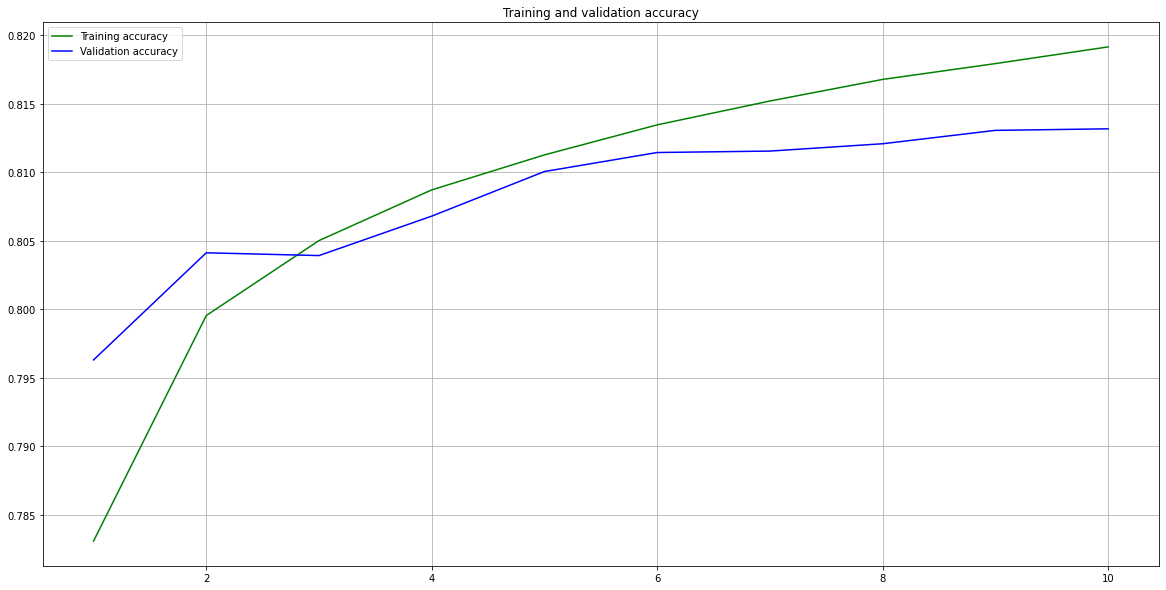

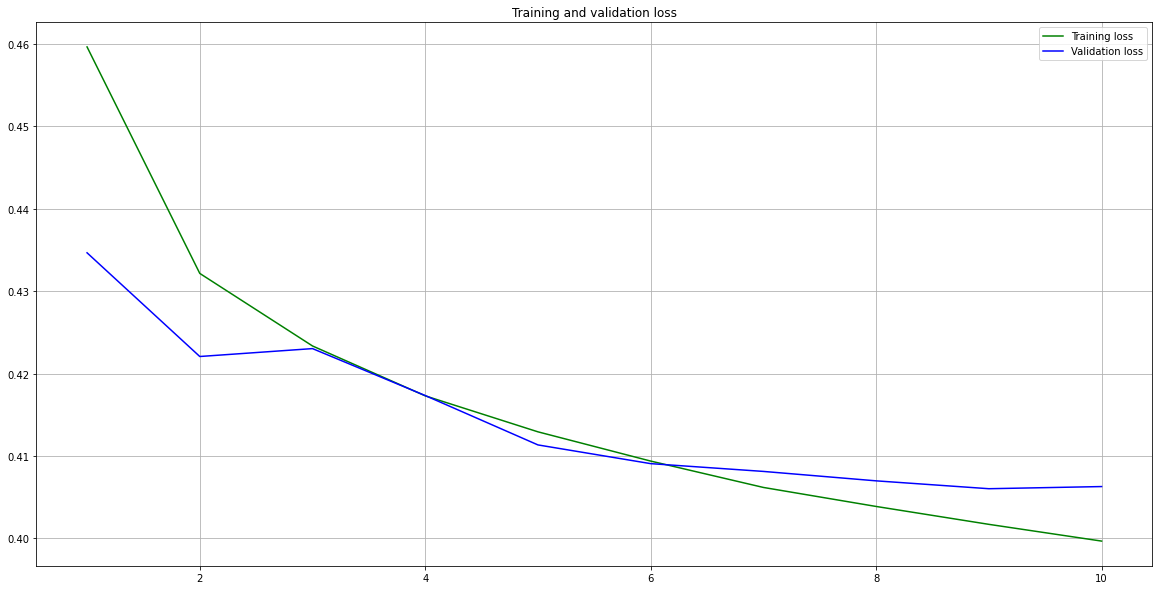

In [22]:
%matplotlib inline
accuracy = model_info.history["accuracy"]
val_accuracy = model_info.history["val_accuracy"]
loss = model_info.history["loss"]
val_loss = model_info.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, accuracy, "g-", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.grid()
plt.legend()

plt.figure(figsize=(20,10))
plt.plot(epochs, loss, "g-", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.grid()
plt.show()

In [23]:
# # saving 
model.save_weights('TweetSentModel.h5')

In [ ]:
# model = keras.models.load_model("embeddings_bidir_gru.keras")

In [32]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(10):
        print("Tweet: ", text_batch.numpy()[i])
        print("Label:", label_batch.numpy()[i])

Tweet:  [ 85   3  65   6 639   7 365   7  70   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Label: 1
Tweet:  [   1    2  212  252   24   34   36    6 1031    1    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Label: 1
Tweet:  [223   6  52   6   1  52   1  84 533 133 9

In [46]:
raw_text = 'I think its not fair though'

In [47]:
test_processed = text_vectorization(raw_text)[np.newaxis, :]
print(test_processed.shape)

(1, 100)


In [48]:
model.predict(test_processed)

array([[0.01976717]], dtype=float32)